# Spam Detection using Naive Bayes Classifier

## Import the dataset and print the basic data

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv("spam.csv", encoding="latin-1")

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

In [7]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

## Preprocess by changing the column name

In [8]:
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

In [9]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [11]:
df['label'].value_counts()

label
0    4825
1     747
Name: count, dtype: int64

## Apply text preprocessing using the 'nltk' library

In [13]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Akash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Convert text into numerical features using CountVectorizer

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
vectorizer = CountVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(df['message'])

In [17]:
y = df['label']

## Split the dataset into Training dataset and Testing dataset

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Build a Multinomial Naive Bayes Model -> Predict the values

In [20]:
from sklearn.naive_bayes import MultinomialNB

In [22]:
model = MultinomialNB()
model.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [23]:
y_pred = model.predict(X_test)

## Evaluation Metrics
- Accuracy
- Precision
- Recall
- F1 Score

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9748878923766816

In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_test, y_pred)

0.9013157894736842

In [39]:
recall_score(y_test, y_pred)

0.9133333333333333

In [40]:
f1_score(y_test, y_pred)

0.9072847682119205

## Confusion Matrix

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[950,  15],
       [ 13, 137]], dtype=int64)

# Real world application of the classifier on unseen emails
## - **'0' represents "Ham"**
## - **'1' represents "Spam"**

In [50]:
new_emails = [
    "Win a free iPhone now",
    "Can we meet tomorrow for the project discussion"
]

In [43]:
new_vectors = vectorizer.transform(new_emails)
model.predict(new_vectors)

array([1, 0], dtype=int64)

# Visualizations
## - Confusion Matrix

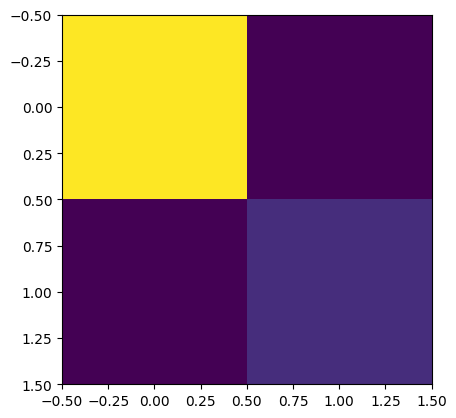

In [37]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm)
plt.show()

## - Spam vs Ham Distribution

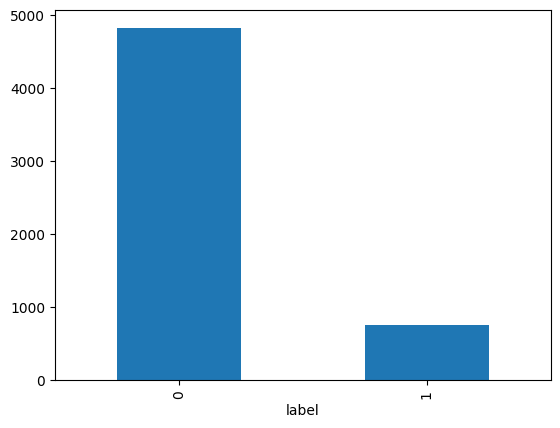

In [44]:
df['label'].value_counts().plot(kind='bar')
plt.show()

## - Email Length Distribution

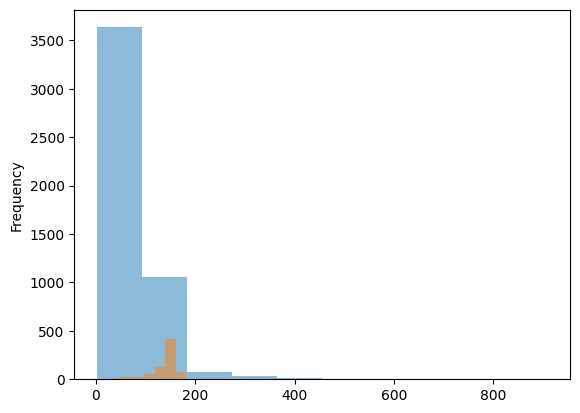

In [45]:
df['length'] = df['message'].apply(len)
df[df['label']==0]['length'].plot(kind='hist', alpha=0.5)
df[df['label']==1]['length'].plot(kind='hist', alpha=0.5)
plt.show()

## - Top 20 words in Spam Emails

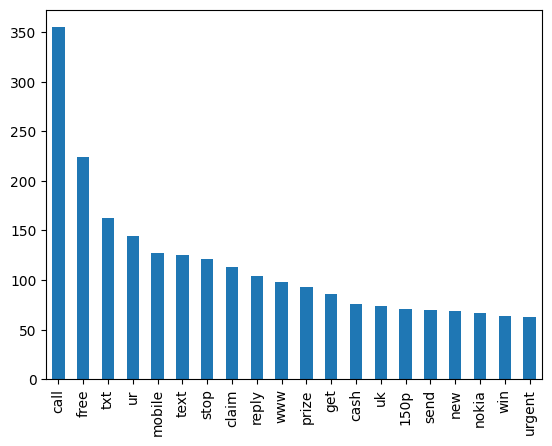

In [46]:
spam_words = vectorizer.fit_transform(df[df['label']==1]['message'])
word_freq = spam_words.sum(axis=0)
words = vectorizer.get_feature_names_out()
freq = word_freq.A1
pd.Series(freq, index=words).sort_values(ascending=False).head(20).plot(kind='bar')
plt.show()

## - Top 20 worrds in Ham Emails

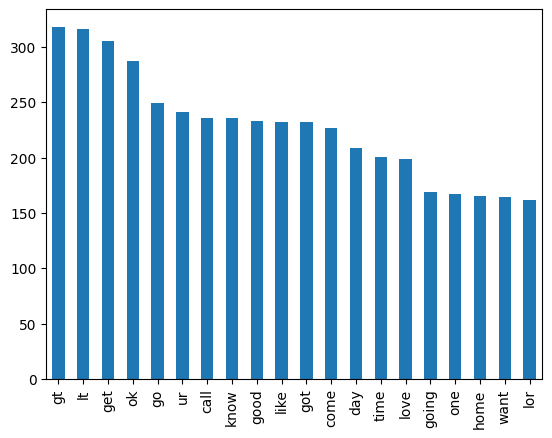

In [47]:
ham_words = vectorizer.fit_transform(df[df['label']==0]['message'])
word_freq = ham_words.sum(axis=0)
words = vectorizer.get_feature_names_out()
freq = word_freq.A1
pd.Series(freq, index=words).sort_values(ascending=False).head(20).plot(kind='bar')
plt.show()

## - Precision-Recall curve

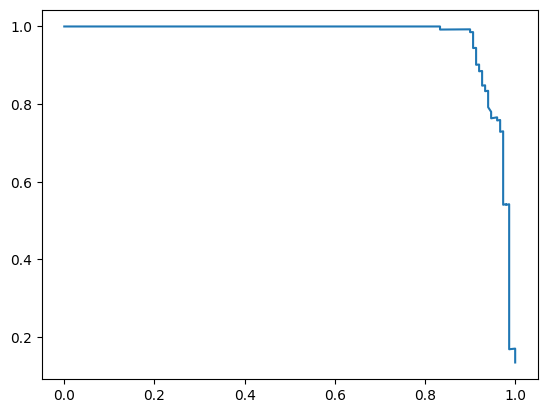

In [48]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.plot(recall, precision)
plt.show()

## - ROC Curve

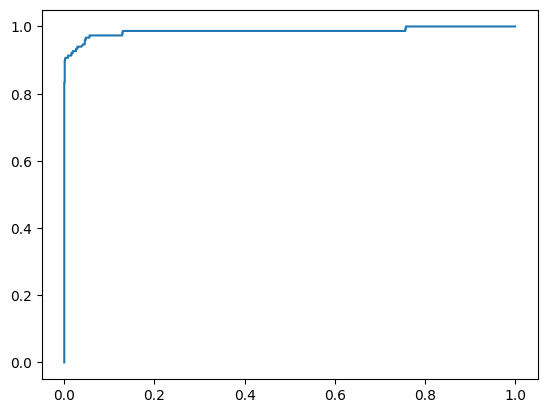

In [49]:
from sklearn.metrics import roc_curve, auc
y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.show()